<a href="https://colab.research.google.com/github/suhyeon0325/multicamp34/blob/main/%E1%84%80%E1%85%B5%E1%84%8E%E1%85%A9%E1%84%90%E1%85%A9%E1%86%BC%E1%84%80%E1%85%A8_240112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 회귀분석

In [ ]:
!pip install statsmodels

  Using cached statsmodels-0.14.1-cp310-cp310-win_amd64.whl.metadata (9.8 kB)
Using cached statsmodels-0.14.1-cp310-cp310-win_amd64.whl (9.8 MB)
   ---------------------------------------- 0.0/233.9 kB ? eta -:--:--
   ---------------------------------------- 233.9/233.9 kB 7.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.formula.api as smf

statsmodels.__version__

'0.14.1'

In [ ]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [ ]:
model = smf.ols(formula = "sepal_length ~ sepal_width", data = iris).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.074
Date:                Fri, 12 Jan 2024   Prob (F-statistic):              0.152
Time:                        11:20:10   Log-Likelihood:                -183.00
No. Observations:                 150   AIC:                             370.0
Df Residuals:                     148   BIC:                             376.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5262      0.479     13.628      0.000       5.580       7.473
sepal_width    -0.2234      0.155     -1.440      0.152      -0.530       0.083
==============================================================================
Omnibus:                        4.389   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                4.237
Skew:                           0.360   Prob(JB):                        0.120
Kurtosis:                       2.600   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
intercept = model.params.Intercept # 절편 (상수항)
slope = model.params.sepal_width # 기울기

print(intercept, slope)

6.526222550894483 -0.22336106112990017


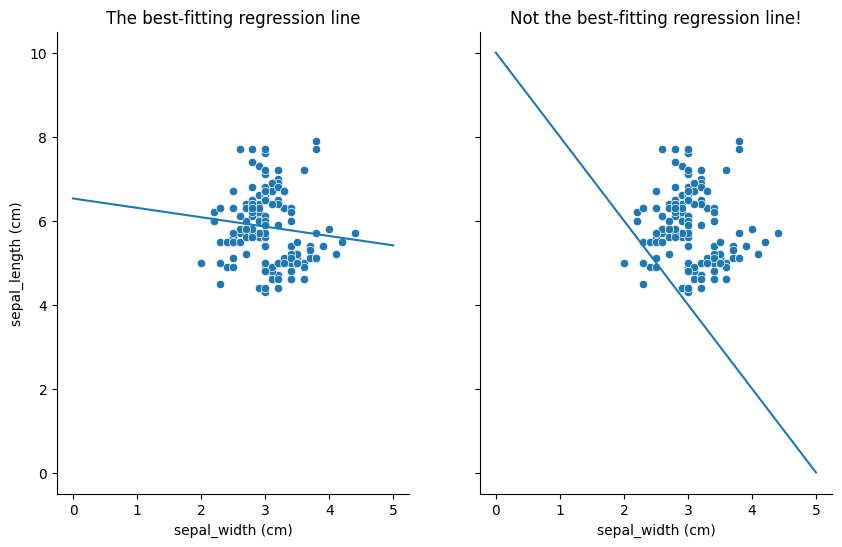

In [ ]:
# 현재 독립변수 sepal_width가 종속변수 sepal_length에 영향을 주지 못한다로 이해하면 될까요??

fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
x = np.linspace(0,5)

sns.scatterplot(data = iris, x = 'sepal_width', y = 'sepal_length', ax = ax[0])
fig.axes[0].set_title("The best-fitting regression line")
fig.axes[0].set_xlabel("sepal_width (cm)")
fig.axes[0].set_ylabel("sepal_length (cm)")
fig.axes[0].plot(x,slope*x+intercept)

sns.scatterplot(data = iris, x = 'sepal_width', y = 'sepal_length', ax = ax[1])
fig.axes[1].set_title("Not the best-fitting regression line!")
fig.axes[1].set_xlabel("sepal_width (cm)")
fig.axes[1].set_ylabel("sepal_length (cm)")
fig.axes[1].plot(x,-2*x+10)

sns.despine()
plt.show()

In [ ]:
!pip install pingouin

  Using cached pingouin-0.5.3-py3-none-any.whl (198 kB)
  Using cached scikit_learn-1.3.2-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached pandas_flavor-0.6.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached outdated-0.2.2-py2.py3-none-any.whl (7.5 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
  Using cached xarray-2023.12.0-py3-none-any.whl.metadata (11 kB)
  Using cached littleutils-0.2.2-py3-none-any.whl
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
Using cached pandas_flavor-0.6.0-py3-none-any.whl (7.2 kB)
Using cached scikit_learn-1.3.2-cp310-cp310-win_amd64.whl (9.3 MB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)
Using cached xarray-2023.12.0-py3-none-any.whl (1.1 MB)


In [ ]:
import pingouin as pg

mod1 = pg.linear_regression(iris['sepal_width'], iris['sepal_length'])
mod1.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,6.53,0.48,13.63,0.00,0.01,0.01,5.58,7.47
1,sepal_width,-0.22,0.16,-1.44,0.15,0.01,0.01,-0.53,0.08


In [ ]:
predictors = ['sepal_width', 'petal_length']
outcome = 'sepal_length'

mod2 = pg.linear_regression(iris[predictors], iris[outcome])
mod2.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.25,0.25,9.07,0.0,0.84,0.84,1.76,2.74
1,sepal_width,0.60,0.07,8.59,0.0,0.84,0.84,0.46,0.73
2,petal_length,0.47,0.02,27.57,0.0,0.84,0.84,0.44,0.51


In [ ]:
iris.loc[:, ['sepal_length', 'sepal_width', 'petal_length']].rcorr()

C:\Users\j2hoo\OneDrive\Desktop\projectDS\venv\lib\site-packages\pingouin\correlation.py:1111: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mat_upper = mat_upper.applymap(replace_pval)


,sepal_length,sepal_width,petal_length
sepal_length,-,,***
sepal_width,-0.118,-,***
petal_length,0.872,-0.428,-


In [ ]:
mod3 = pg.linear_regression(iris['petal_length'], iris['sepal_length'])
mod3.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,4.31,0.08,54.94,0.0,0.76,0.76,4.15,4.46
1,petal_length,0.41,0.02,21.65,0.0,0.76,0.76,0.37,0.45


In [ ]:
mod4 = pg.linear_regression(iris['sepal_width'], iris['sepal_length'])
mod4.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,6.53,0.48,13.63,0.00,0.01,0.01,5.58,7.47
1,sepal_width,-0.22,0.16,-1.44,0.15,0.01,0.01,-0.53,0.08
